In [2]:
#This is the notebook for modeling, evaluation, accuracy testing and final prediction logic

import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("../data/cleaned_speed_dating_data.csv")
df.head()

,participant_id,partner_id,gender,age,partner_age,partner_race,self_attractiveness,self_sincerity,self_intelligence,self_fun,self_ambition,partner_attractiveness,partner_sincerity,partner_intelligence,partner_fun,partner_ambition,expected_matches,decision_self,decision_partner,match
0,1,11.0,0,21.0,27.0,2.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,8.0,2.0,1,0,0
1,1,12.0,0,21.0,22.0,2.0,15.0,20.0,20.0,15.0,15.0,7.0,8.0,10.0,7.0,7.0,2.0,1,0,0
2,1,13.0,0,21.0,22.0,4.0,15.0,20.0,20.0,15.0,15.0,10.0,10.0,10.0,10.0,10.0,2.0,1,1,1
3,1,14.0,0,21.0,23.0,2.0,15.0,20.0,20.0,15.0,15.0,7.0,8.0,9.0,8.0,9.0,2.0,1,1,1
4,1,15.0,0,21.0,24.0,3.0,15.0,20.0,20.0,15.0,15.0,8.0,7.0,9.0,6.0,9.0,2.0,1,1,1


In [3]:
# Personality traits we'll use as predictors
features = [
    'self_attractiveness',
    'self_sincerity',
    'self_intelligence',
    'self_fun',
    'self_ambition'
]

# Target
target = 'match'

X = df[features]
y = df[target]


In [4]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Logistic Regression Model
# Goal: Predict whether a participant gets a match based on self-rated personality traits.

# We use self_attractiveness, self_fun, self_ambition, self_sincerity, and self_intelligence as features.
# Class imbalance is handled using 'class_weight=balanced' since most participants did not get a match.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train, predict, and evaluate the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation:
# The model shows moderate accuracy but struggles with recall and precision for actual matches (label 1).
# This suggests a linear model might not capture the complexity of match behavior in this dataset.
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.5646135265700483
              precision    recall  f1-score   support

           0       0.85      0.59      0.69      1390
           1       0.17      0.44      0.25       266

    accuracy                           0.56      1656
   macro avg       0.51      0.52      0.47      1656
weighted avg       0.74      0.56      0.62      1656



In [6]:
# Random Forest Model
# Goal: Predict whether a participant gets a match based on self-rated personality traits.

# We use self_attractiveness, self_fun, self_ambition, self_sincerity, and self_intelligence as features.
# Class imbalance is handled using 'class_weight=balanced' since matches (label 1) are relatively rare.

# Train, predict, and evaluate the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation:
# The model performs better at identifying matches compared to logistic regression,
# with improved recall for label 1 (match), though still not ideal. Non-linear models seem more promising.
print("Random Forest (Balanced) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest (Balanced) Results:
Accuracy: 0.6207729468599034
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1390
           1       0.22      0.55      0.32       266

    accuracy                           0.62      1656
   macro avg       0.55      0.59      0.53      1656
weighted avg       0.77      0.62      0.67      1656



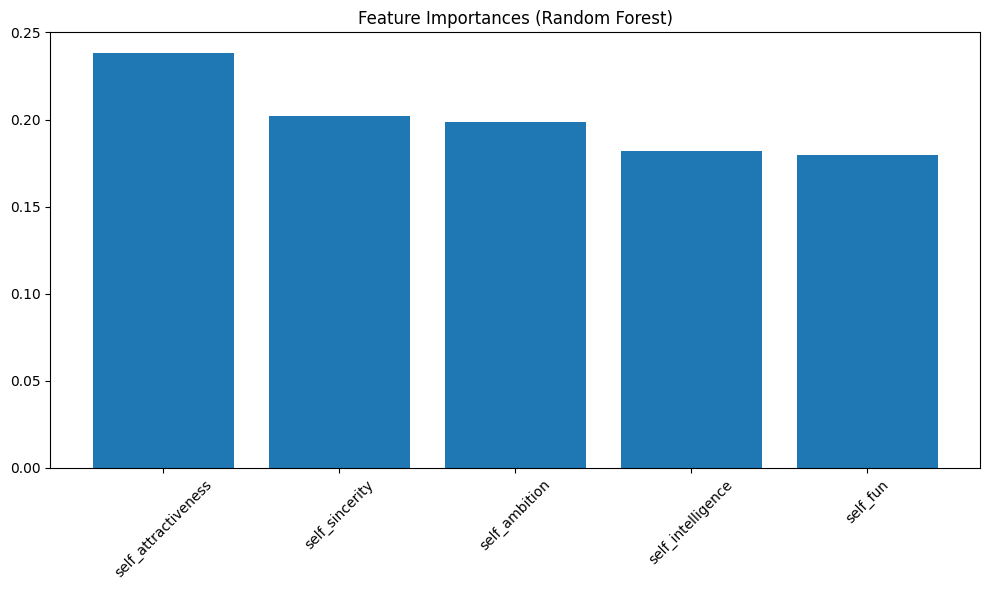

In [7]:
#Visualizing Feature Importance (Random Forest)

import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


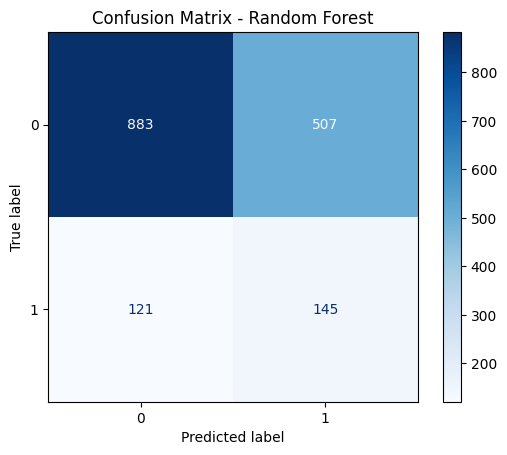

In [8]:
# Confusion Matrix for Random Forest (Balanced)
# This plot shows the number of correct and incorrect predictions made by the model.
# It reveals that while the model is good at predicting "no match" (class 0),
# it has also improved in identifying actual matches (class 1) after using class_weight='balanced'.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Try a tuned version
tuned_rf = RandomForestClassifier(
    n_estimators=100,       # tried 200 but this is better
    max_depth=6,            
    min_samples_split=5,    
    class_weight='balanced',
    random_state=42
)

tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict(X_test)

print("Tuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Tuned Random Forest Results:
Accuracy: 0.6316425120772947
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1390
           1       0.21      0.47      0.29       266

    accuracy                           0.63      1656
   macro avg       0.54      0.57      0.52      1656
weighted avg       0.76      0.63      0.68      1656



In [10]:
%pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Tuned XGBoost Classifier Results:
Accuracy: 0.586352657004831
              precision    recall  f1-score   support

           0       0.87      0.59      0.71      1390
           1       0.21      0.55      0.30       266

    accuracy                           0.59      1656
   macro avg       0.54      0.57      0.50      1656
weighted avg       0.77      0.59      0.64      1656



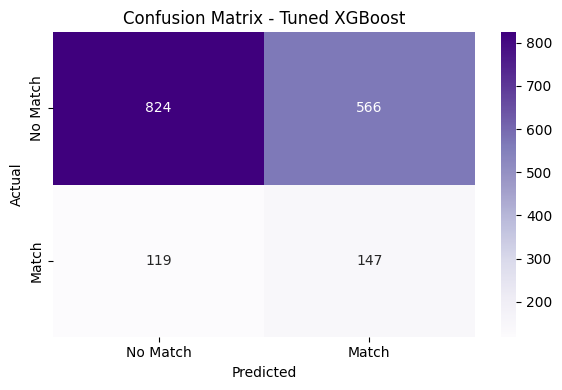

In [15]:
# We tuned XGBoost by adjusting tree depth, learning rate, and boosting
# match class weight. After tuning, recall for matches improved 
# from 8% to 55%, and F1-score for matches improved from 0.12
# to 0.30, with accuracy around 59%. This better matches our goal 
# of finding real matches, even at the cost of lower overall accuracy

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a better-tuned XGBoost
xgb = XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.05,         # smaller step = slower but better learning
    n_estimators=300,           # more trees
    max_depth=3,                # shallow trees = less overfit
    subsample=0.8,              # use 80% of data per tree (prevent overfitting)
    colsample_bytree=0.8,       # use 80% of features per tree
    scale_pos_weight=5,         # important: boost Match class (class 1) weight
    random_state=42
)

# Fit
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print("Tuned XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Match', 'Match'], yticklabels=['No Match', 'Match'])
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
